<a href="https://colab.research.google.com/github/Kaiyan369/Potential-Customer-Predictions/blob/main/GitHub_Potential_Customers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

from IPython.display import display, HTML

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MIT Classification & Hypothesis/ExtraaLearn.csv")

In [ ]:
# View the first 5 rows of the dataset
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# Understand the shape of the data
df.shape

(4612, 15)

In [ ]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**
*   The number of non-null values are the same.  This indicates there are **no null values**.
*   "ID" column is an identifier for leads in the data.  This column will not help with the analysis, so will drop the column.
*   current_occupation, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, 	educational_channels, referral are catergorical columns.






In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# drop the 'ID' column
data = df.drop(['ID'], axis = 1)

In [ ]:
# check if it is one less column
data.shape

(4612, 14)

In [ ]:
# get the statistical info for the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations:**
*   The average age is 46 years old, there are some outliers: 63 years old
*   The average number of website visits is between between 3 - 5 vists
*   Total time spent on the websit is around 12 minutes (724 seconds), there is a big deviation (std = 743 seconds) on how much time spent on website,  
*   The average number of pages on website viewed is around 3 pages (up to 75% people)





In [ ]:
data.describe(include = 'O').T

,count,unique,top,freq
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


**Observations:**
*   Current Occupation: most of them are professional
*   First interaction: most of the time, the first interaction is from webite.
*   Profile completed: a bit less than half of the leads have completed majority of their profiles.
*   Last activity: almost half of them had email as thier last interaction with Extraalearn,
*   Newspaper, Magazine, digital platforms, educational channels: almost majority of them have never seen any of these media adverts. Those medial adverts do not have impact on them
*   Referal: referal program does not seem have impact on most leads.  Leads did not hear about ExtraaLearn through reference.









## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### **Univariate analysis of numerical columns**

In [ ]:
# define numeric columns
numeric_columns = data.select_dtypes(include = ['int64','float64']).columns.tolist()
numeric_columns.remove('status') # status column is the dependent value, not independent value
numeric_columns

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

In [ ]:
# create a function for subplot to explore all numerical variables
def subplot_func(data, columns, kde = True):
  for col in columns:
    print ('        ')
    display(HTML(f"<b>{col}</b>")) #print(col)
    print ('        ')
    fig, (ax_box, ax_hist) = plt.subplots(2,1, sharex = True, gridspec_kw = {'height_ratios': (1,3)}, figsize = (12,7),)
    sns.boxplot(data, x = col, showmeans = True, ax = ax_box, color = 'violet')
    sns.histplot(data, x = col, ax = ax_hist, kde = True)
    ax_hist.axvline(data[col].mean(), color ='green', linestyle ='--')
    ax_hist.axvline(data[col].median(), color = 'black', linestyle = '-')
    plt.show()

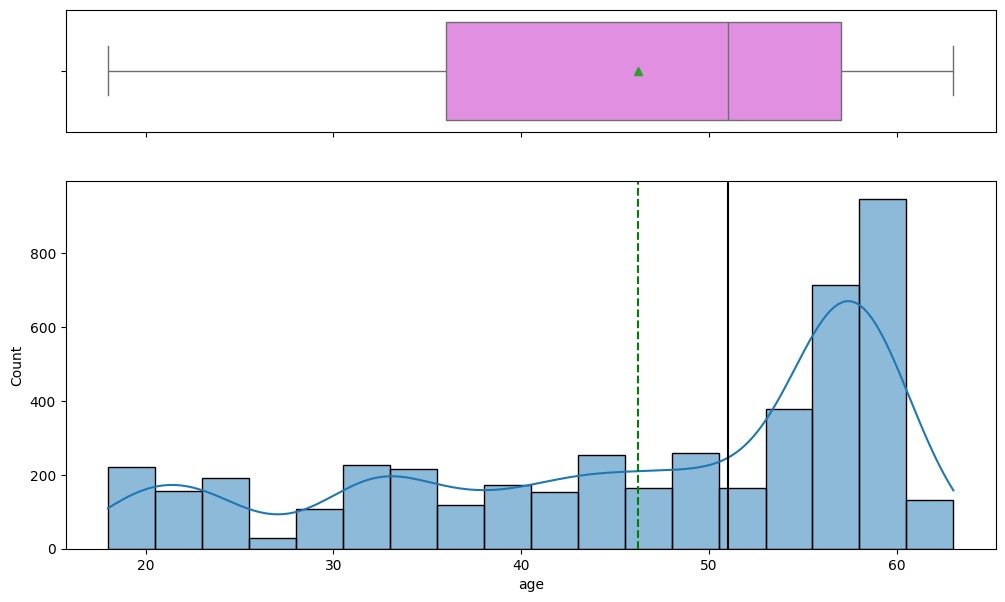

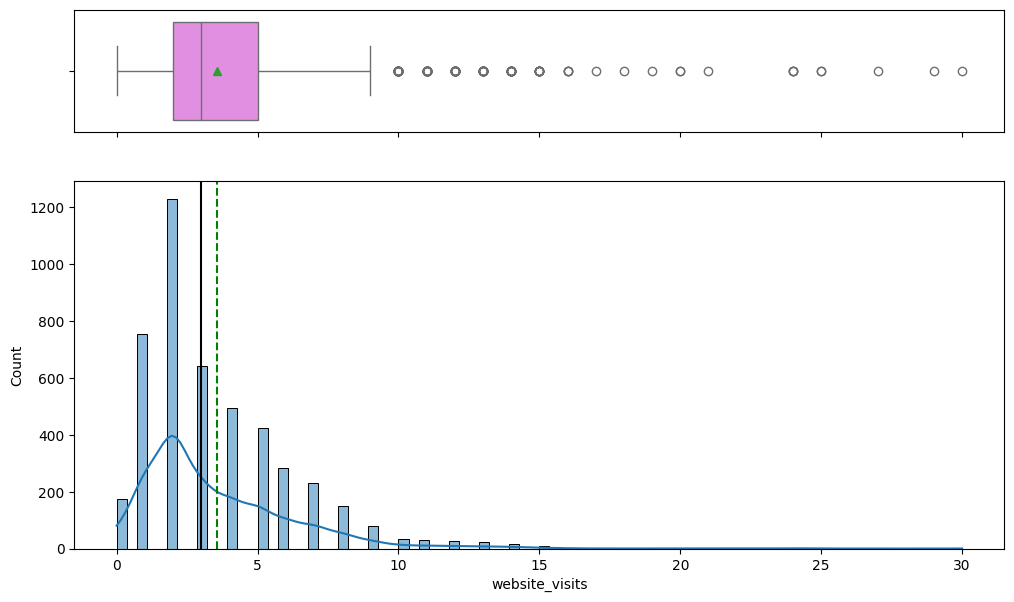

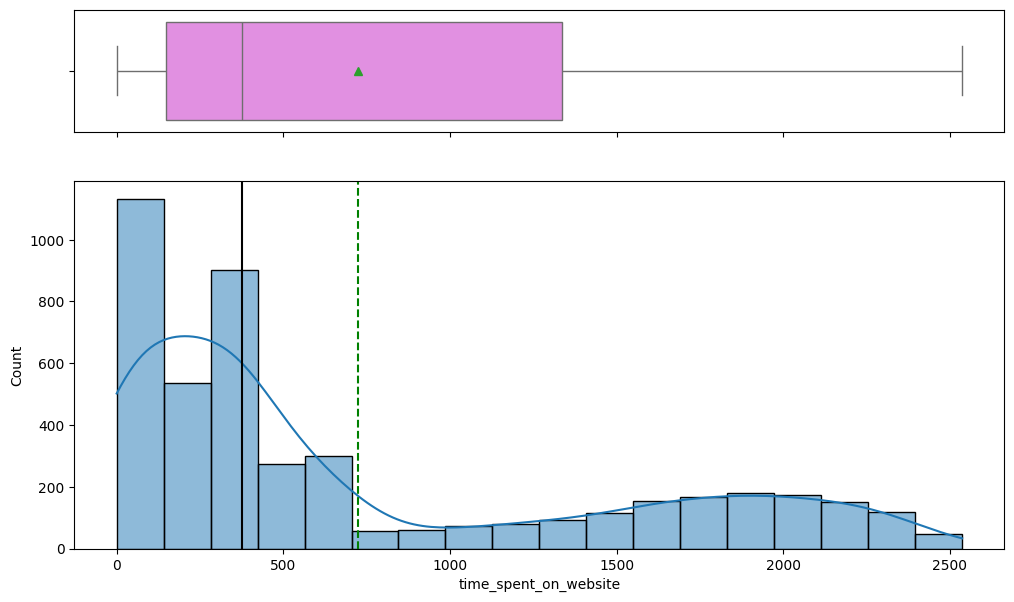

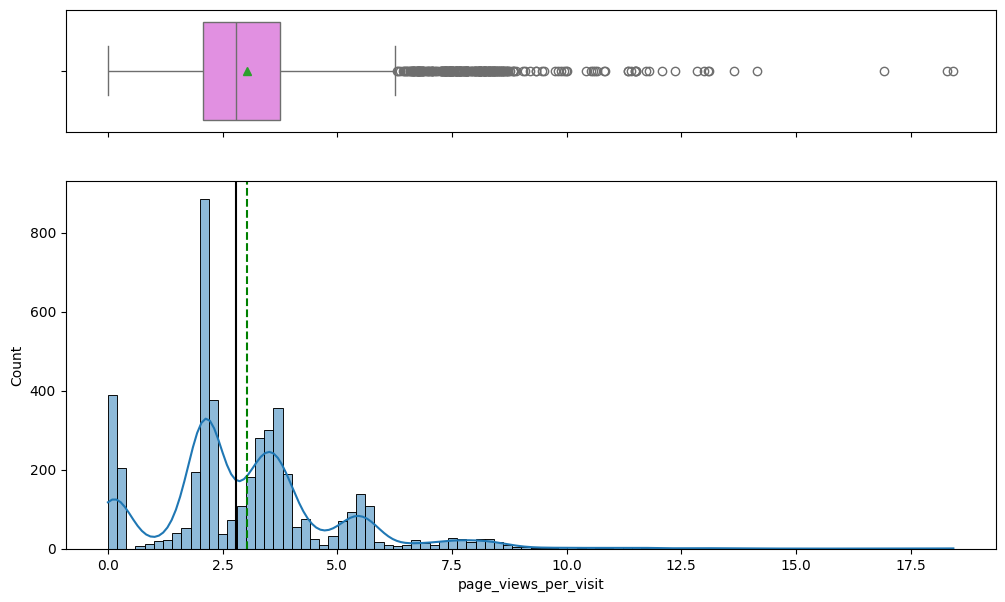

In [ ]:
subplot_func(data, numeric_columns)

**Observations:**
1.   Age: Even though the average age is around 46 years old, but majority of the leads are between 50 - 60 years.  There are many outliers based on the boxplot, the age distribution is left skewered.
2.   Website visit: The average is around 3 visits, but 2 visits has the highest count. The distribution is right skewed
3.   Time spent on website: even though the average is around 700 seconds (12 minutes), however, majority of them spent less than 500 seconds (8 minutes). The distribution of time spent is right skewed.
4.   Page per visit varies, most visited 2 pages, there are people visit 3 to 4 pages.  There are many outliers




### **Univariate analysis for categorical variables**

In [ ]:
# Define categorical columns
categorical_columns = data.select_dtypes(include = ['object']).columns.tolist()
categorical_columns

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [ ]:
# print % of each sub-category for each categorical column
for col in categorical_columns:
  print(data[col].value_counts(normalize=True))
  print('*'*40)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************
educ

In [ ]:
# check categorical column 'status'
data['status'].value_counts(normalize = True)

,proportion
status,
0,0.701431
1,0.298569


**Observations:**
*   Current Occupation - over half of them are professional, students are the least, only 12%
*   First interaction - over half of the leads interacted via website, mobile app is also a good alternative
*   Profile completed - most of the leads have either high & medium completed profiles, the portion has equal share.
*   Last activiy of the leads is mainly email
*   Around 90% of the media adverts on Newpaper, Magazine, digital platforms, and education channels have not been heard by the leads.
*   Referral - only 2% referals have been heard by the leads
*   Status - 70% leads did not covert to paid customers











### **Bivariate and Multivariate analysis**

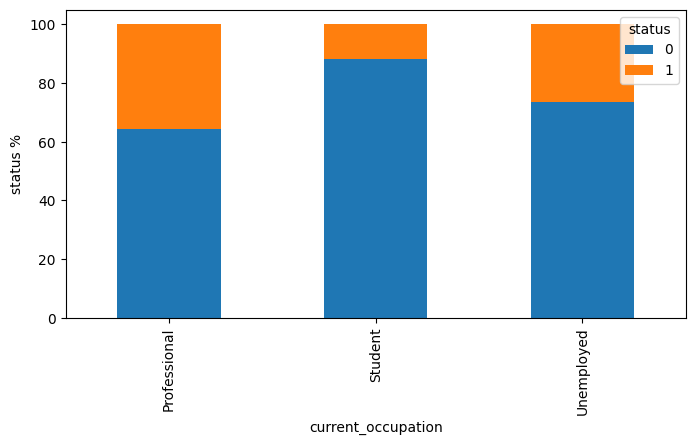

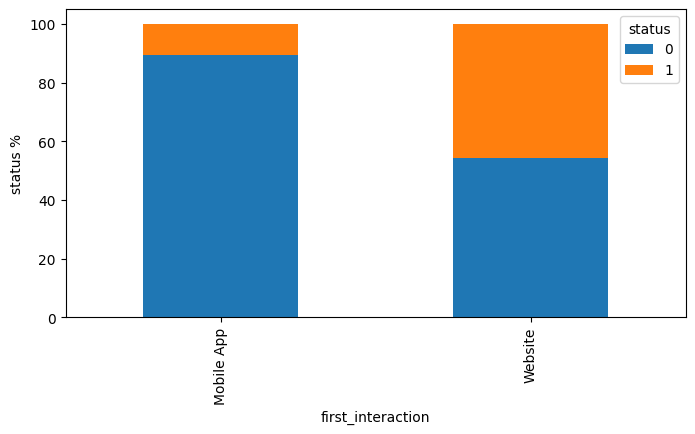

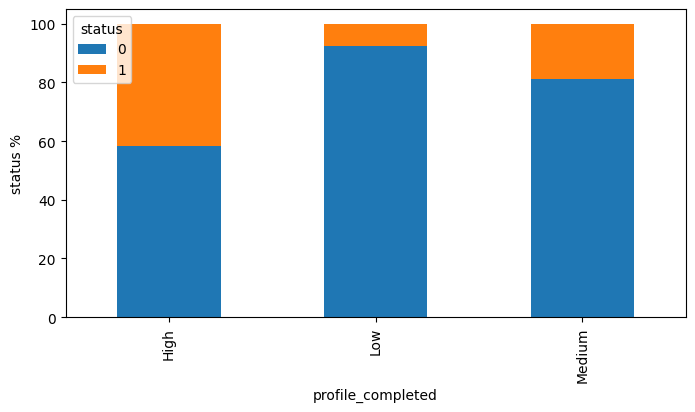

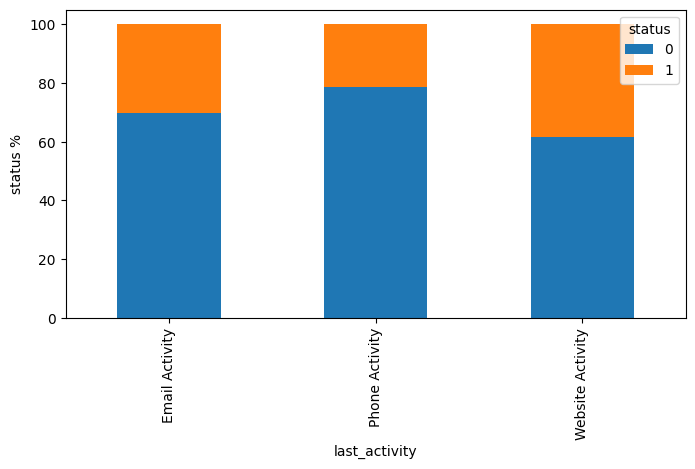

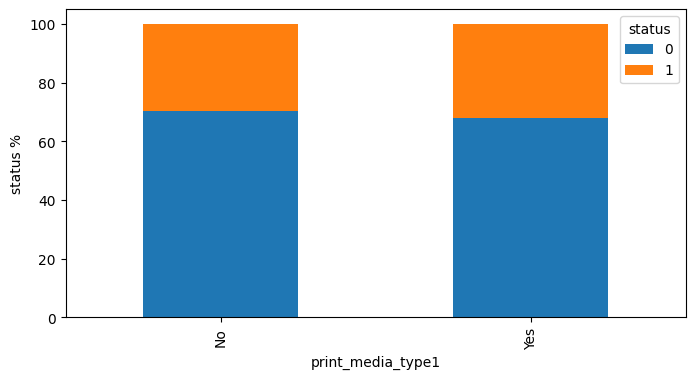

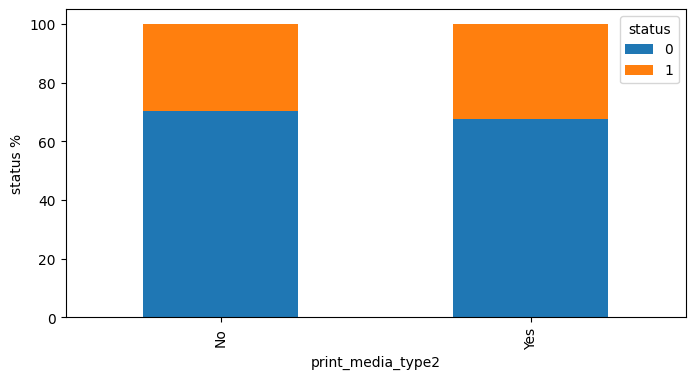

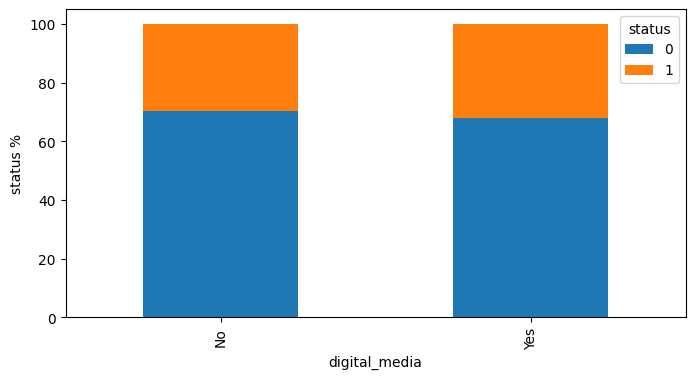

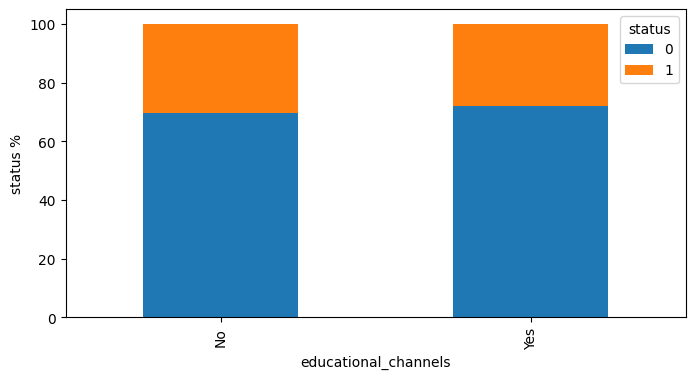

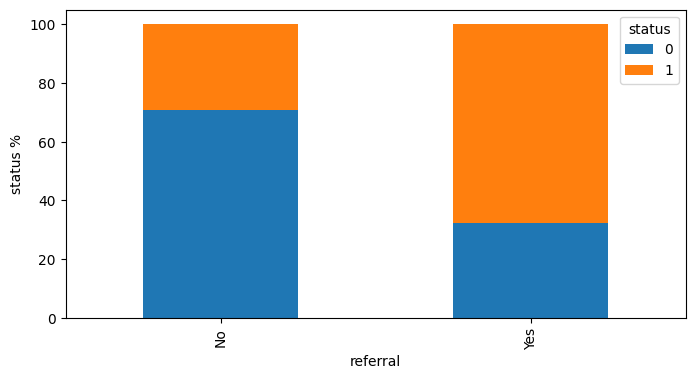

In [ ]:
# check how status is related with other categorical variables
for col in categorical_columns:
   (pd.crosstab(df[col],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
   plt.ylabel('status %')

**Questions**

*-->Based on the above stacked bar charts, we can answer the questions below.*

**1.** Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

**Answer:** When the occupation is professional, over 40% chance leads can be converted to paid customers.

**2.** The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

**Answer:** Yes, first interaction on website can have 50% chance to convert leads to paid customers

**3. **The company uses multiple modes to interact with prospects. Which way of interaction works best?

**Answer:** website interactions works the best since it has highest chance to convert leads to paid customers.

**4.** The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

**Answer:** Referrals have the highest lead conversion rate.

**5.** People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Answer:** yes, high completion of profiles increases the chance of conversion.

In [ ]:
# Check the relationship between Status and Numerical variables
data.groupby(['status'])[numeric_columns].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


**Observations:**
Older age and longer time spent on website increase the chance of conversion.

<Axes: >

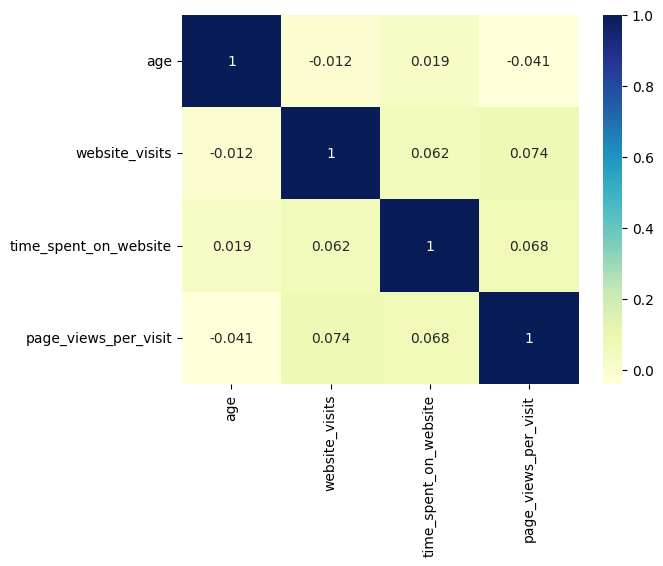

In [ ]:
# create a heatmap to gain the correlation between numeric variables
sns.heatmap(data[numeric_columns].corr(), annot = True, cbar = True, cmap = 'YlGnBu')

**Observations** - low correlation amongst numeric variables.  30% correlation between time_spent_on_website and status.  

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### **Missing value and Outlier detection**

In [ ]:
# check missing values
data.isnull().sum()

,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0
print_media_type2,0


Observation - there are no missing values.

*Outlier detection* :

based on the subplot made in Section "Univariate analysis of numerical columns", there are many outliers in "website visit" and "page_view_per visit" columns.  They have low correlation with the "status"column - conversion to paid customers.  Hence the outliers do not have major impact on the dependent value "status".

### **Data Preparation for Model Building**

In [ ]:
# Encode categorical columns, create dummy variables for them
data_ohe = pd.get_dummies(data, columns = categorical_columns, drop_first=True )

In [ ]:
# seperate target variable and independent variables
x = data_ohe.drop('status',axis = 1)
y = data_ohe ['status']

In [ ]:
# split the dataset into train data and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, shuffle = True, random_state = 1)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0    0.704151
1    0.295849
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0    0.695087
1    0.304913
Name: proportion, dtype: float64


## Building a Decision Tree model

In [ ]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
# Initialise the classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# make the prediction on the training data
dt_predict_train = decision_tree.predict(x_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



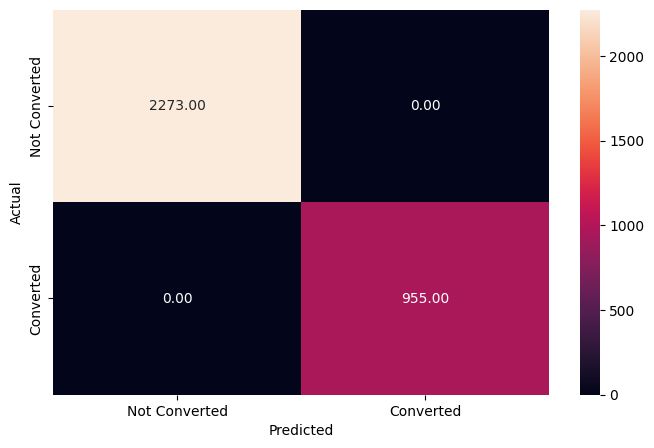

In [ ]:
# check the performance of the model
metrics_score (y_train, dt_predict_train)

**Observations:**
- There are no false positive and false negative.
- The Accuracy, Precision, Recall and F1 score are all perfect to 1. This indicates there are maybe some overfitting.

In [ ]:
# make the prediction on the test data
dt_predict_test = decision_tree.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       962
           1       0.69      0.69      0.69       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



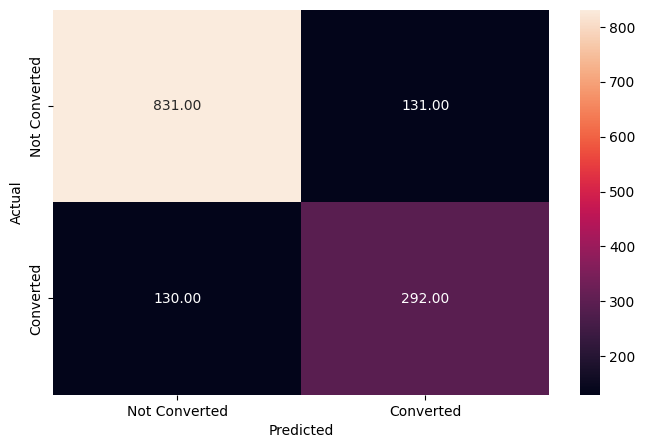

In [ ]:
# check the performance of the model based on test data
metrics_score (y_test, dt_predict_test)

**Observations: **
*   All performance scores on test data have reduced compare to training data.
*   F1-score for predicting a lead convert to a paid customer (i.e. "1" outcome) is 0.70, it is relatively low.
*   Recall result means a lead is converted to a paid customer in reality but the model predict negatively (false negative), that means we potentially may lose a customer, hence recall result is important.   Recall result is 0.71, also relatively low.   
*   The model can be still some overfitting, try to prune the tree.




## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.25, 1: 0.75})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 11),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, criterion='entropy',
                       max_depth=np.int64(3), min_samples_leaf=5,
                       random_state=7)

In [ ]:
# make the prediction on the test data
dt_tuned_predict_test = d_tree_tuned.predict(x_test)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



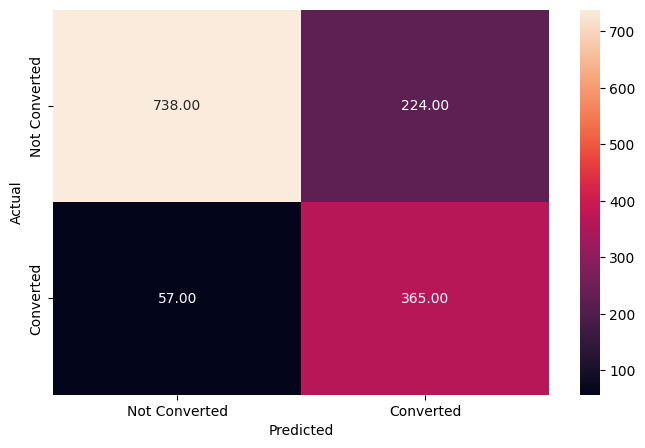

In [ ]:
# check the performance of the tuned model based on test data
metrics_score (y_test, dt_tuned_predict_test)

**Observations:**
*   Recall score for "1" has improved from 0.69 to 0.86.  Recall score is important as we want to avoid false negative which means it's predicted that leads not convert to paid customers, but in reality they're paid customers.  That will result in losing customers.
*   F1 score not changed too much
*   Accuracy has dropped slightly to 0.8





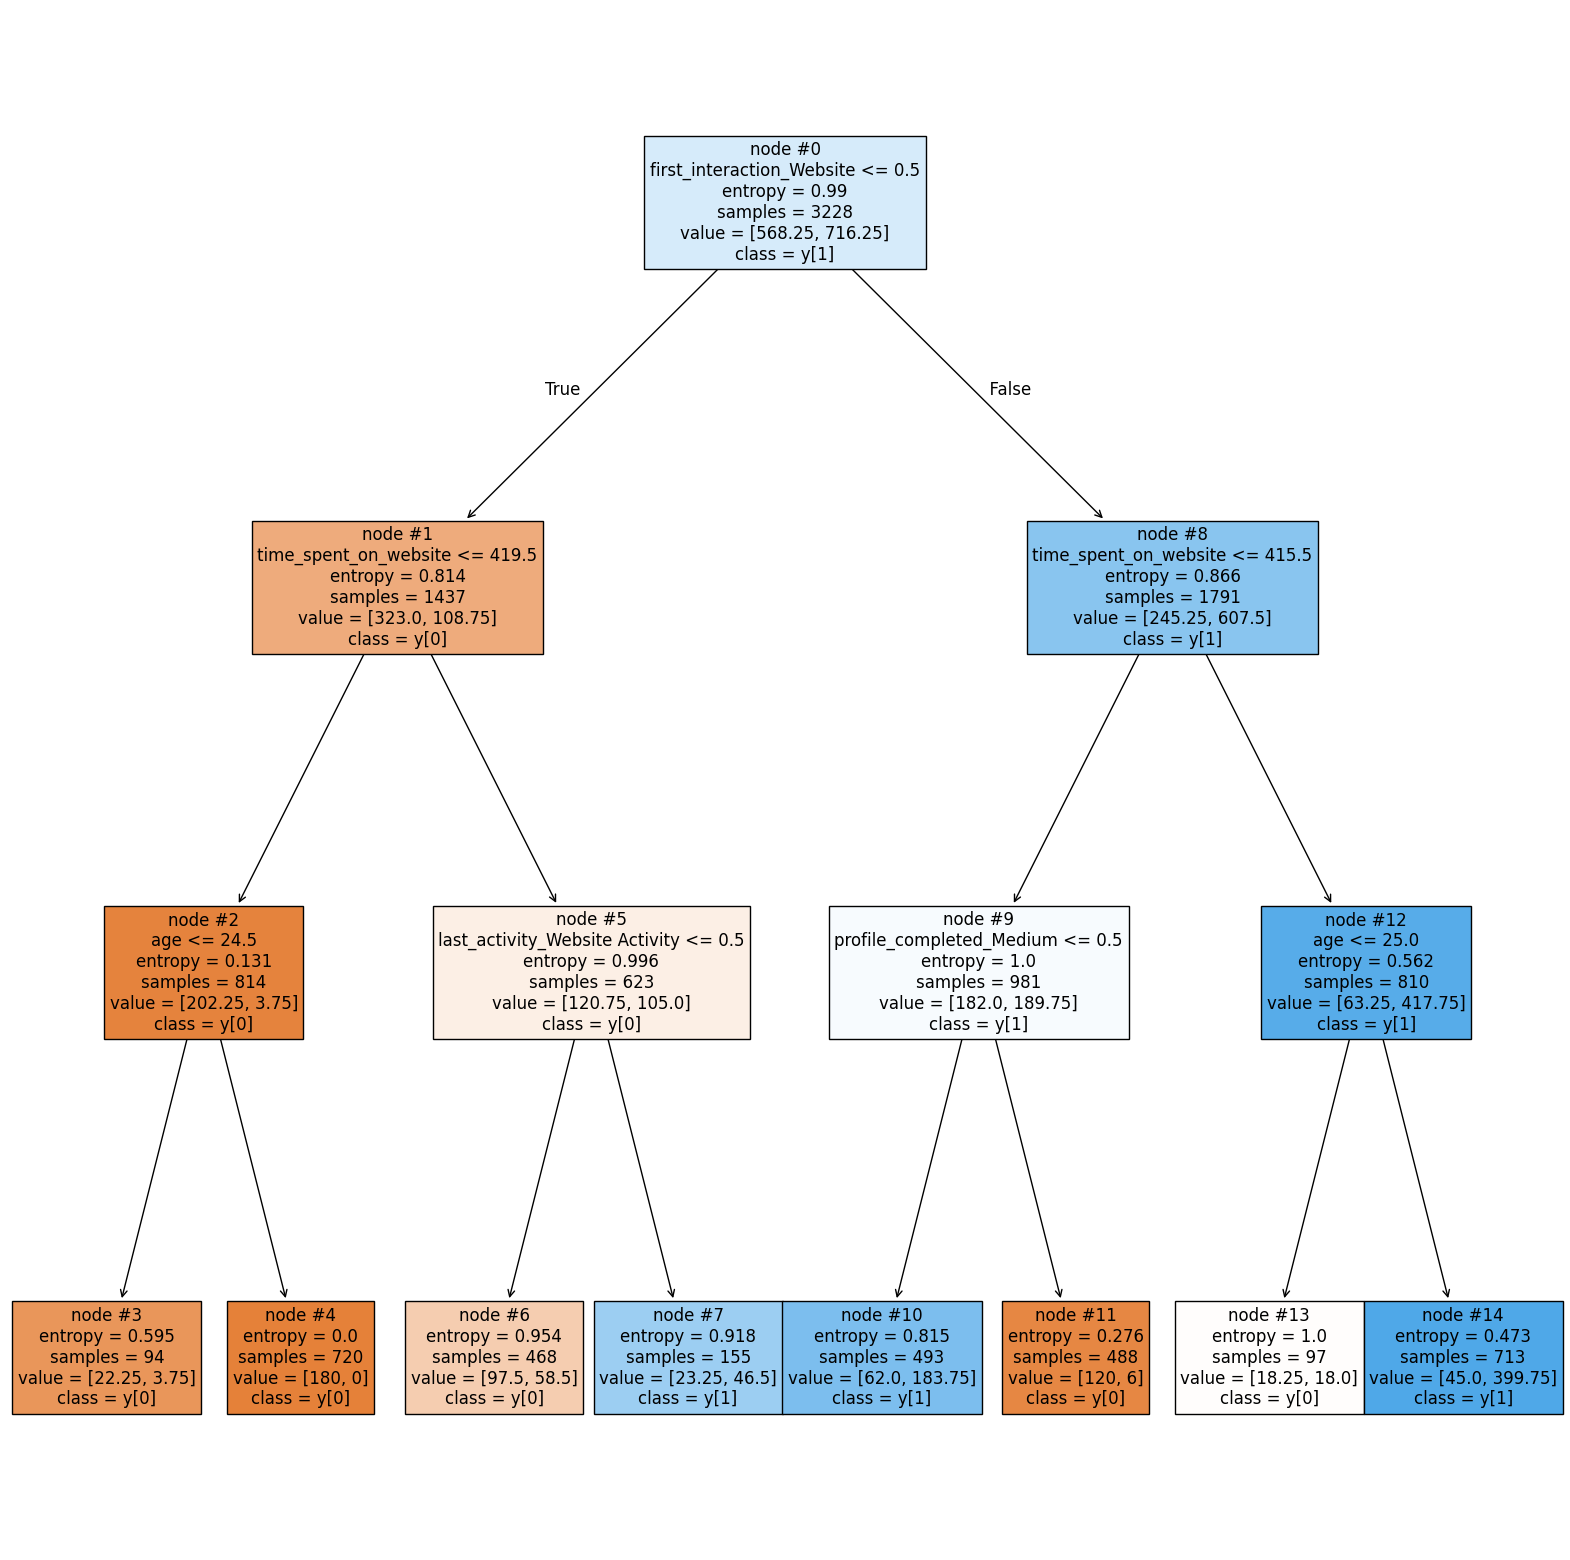

In [ ]:
# visualise the pruned tree
features = list(x.columns)
plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 12,
               node_ids = True, class_names = True)
plt.show()

**Observations:**
1.   The depth of the tree is 3
2.   The entropies for predicting leads will not be converted to a paid customer can be kept to minimum, e.g., 0.276 and 0
3.   When the leads first interact is website, time spent on websit is less than 419.5 seconds, age is older than 24.5 years old, then they will not become a paid customer (entropy = 0 and reach to the leaf node).
4.   The lowest entropy for the  prediction of a lead do convert to a paid customer is 0.473. When the leads first interaction are not website, time spent on website > 415 seconds, and age are over 25 years old, then they are likely will become a paid customer.






## Building a Random Forest model

In [ ]:
# Initiate Random Forest model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# make the prediction on test data
rf_classifier_pred = rf_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       962
           1       0.80      0.68      0.73       422

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.81      1384
weighted avg       0.85      0.85      0.84      1384



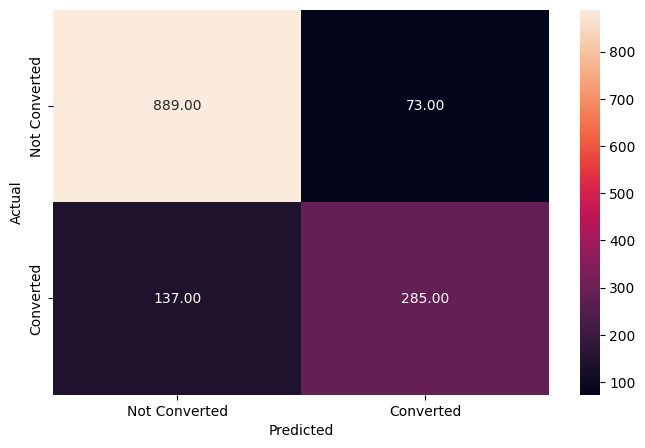

In [ ]:
# check the model performance based on test data
metrics_score(y_test, rf_classifier_pred)

**Observations:**
- F1 scores have improved overall compare to Decision Tree (after prunning)
- Although Recall score for "1" has reduced to 0.68.  Also F1 score for recall remain the same as Decision Tree (after prunning).

## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier
rf_classifier_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 130],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.25, 1: 0.75}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_classifier_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Save the best estimator to variable rf_classfier_tuned
rf_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_classifier_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.25, 1: 0.75}, criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=110, random_state=7)

In [ ]:
# make the prediction based on training data
rf_classifier_tuned_predt = rf_classifier_tuned.predict(x_train)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2273
           1       0.67      0.88      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



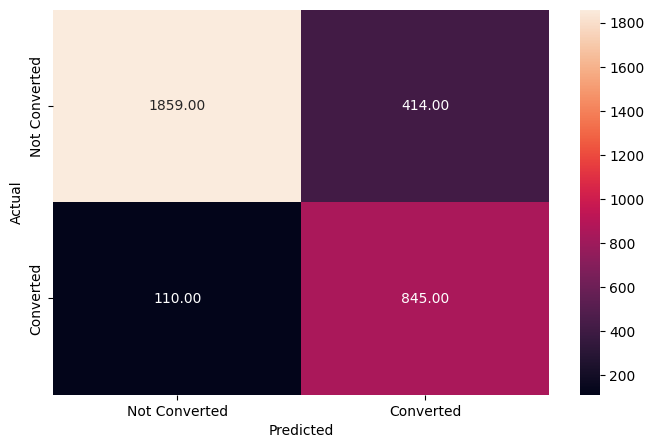

In [ ]:
# check the performance of the tuned random forest
metrics_score(y_train, rf_classifier_tuned_predt)

In [ ]:
# make the prediction based on test data
rf_classifier_tuned_pred = rf_classifier_tuned.predict(x_test)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       962
           1       0.68      0.86      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.86      0.83      0.84      1384



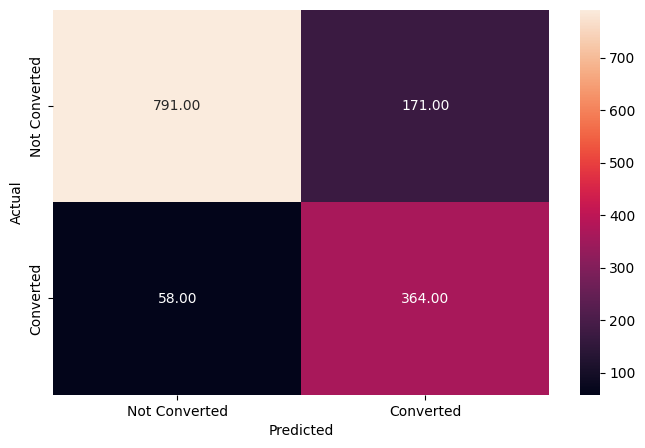

In [ ]:
# check the performance of the tuned random forest on test data
metrics_score(y_test, rf_classifier_tuned_pred)

**Observations:**
- F1 score for "1" is the highest 0.76 compare to previous models (decision tree & random forest before prunning).
- The accuracy remains similar before and after prunning.
- Recall score remains similar before and after prunning.

In [ ]:
# Importance of features in the tree building
print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Important"], index = x_train.columns).sort_values(by = 'Important', ascending = False))

                                Important
time_spent_on_website            0.348579
first_interaction_Website        0.324583
profile_completed_Medium         0.242929
age                              0.062540
last_activity_Website Activity   0.021369
current_occupation_Student       0.000000
page_views_per_visit             0.000000
website_visits                   0.000000
profile_completed_Low            0.000000
current_occupation_Unemployed    0.000000
last_activity_Phone Activity     0.000000
print_media_type1_Yes            0.000000
print_media_type2_Yes            0.000000
digital_media_Yes                0.000000
educational_channels_Yes         0.000000
referral_Yes                     0.000000


In [ ]:
# Importance of features in the Random Forest building
print (pd.DataFrame(rf_classifier_tuned.feature_importances_, columns = ["Important"], index = x_train.columns).sort_values(by = 'Important', ascending = False))

                                Important
time_spent_on_website            0.302328
first_interaction_Website        0.278156
profile_completed_Medium         0.197087
age                              0.060288
last_activity_Phone Activity     0.036605
current_occupation_Unemployed    0.034830
last_activity_Website Activity   0.032473
current_occupation_Student       0.023580
page_views_per_visit             0.018569
website_visits                   0.010838
profile_completed_Low            0.002647
educational_channels_Yes         0.002000
digital_media_Yes                0.000332
print_media_type1_Yes            0.000267
print_media_type2_Yes            0.000000
referral_Yes                     0.000000


**Observations:**

Both tuned models: Decision Tree and Random Forest have selected the same importance for *four* features:
1.   time spent on website
2.   first interaction: website
3.   profile completed: medium
4.   age
5.   last acvitiy

For tuned decision tree, the rest of the features have no impact on the models.

For tuned random forest, features like occupation-unemployed & page view per visits have small impact on the model, the model gives  importance to more features than turned decision tree.



## Actionable Insights and Recommendations

**-Insights**
- Leads who spent more time on website (>415 seconds), their first interaction is website too, they are older (> 25) and either unemployed or students, and their profiles are medium completed are highly likely to be converted to paid customers.
- The factors driving leads conversion process are: time spent on website, their first and last interactions are website activities.
- Profile leads which are likely to convert are those older than 25 years old, and either unemployed or students

**- Recommendations:**
*   Improve website experience, make the website more user friendly so that it's more attractive for people spend more time on it.
*   Profile creation: make it as simple and straight forward as possible to encourage the user to complete the profile
*   For the learning topics, focus on helping leads find jobs as those leads who are unemployed and students have the motivation to enroll the courses become paid customers




